In [29]:
# numerical and scientific computing libraries
import numpy as np
import scipy as sp

# plotting libraries
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
# create a random matrix of size m x n with the rank <= k <= min(m, n).
def create_random_matrix(m: int, n: int, k: int) -> np.ndarray:
    if k > min(m, n):
        raise ValueError("k must be less than or equal to min(n, m)")
    A = np.random.randn(m, k)
    B = np.random.randn(k, n)
    return A@B

In [31]:
# perform LU decomposition on a random matrix of rank k <= min(n, m).
# check that the product of L and U is equal to the original matrix.
# check that the rank of L and U is equal to k.
def test_lu_decomposition(m: int, n: int, k: int):
    A = create_random_matrix(m, n, k)
    
    Qt, L, U = sp.linalg.lu(A)
    Q = Qt.T

    error = np.linalg.norm(Q@A - L@U)
    rank_l = np.linalg.matrix_rank(L)
    rank_u = np.linalg.matrix_rank(U)

    assert rank_u == k, f"Rank of U is not equal to {k} ({rank_u})"
    # check whether error is small enough using the machine epsilon
    assert error <= n * m * np.finfo(float).eps, f"Error is too large ({error})"

    return A, Q, L, U, error

In [32]:
m=10
n=11
k=7
n_repeats = 10

# test LU decomposition with n, m and k for n_repeats times.
# collect LU decomposition errors and the ranks of U.
errors = []
ranks = []

for i in range(n_repeats):
    A, Q, L, U, error = test_lu_decomposition(m, n, k)
    errors.append(error)
    ranks.append(np.linalg.matrix_rank(U))

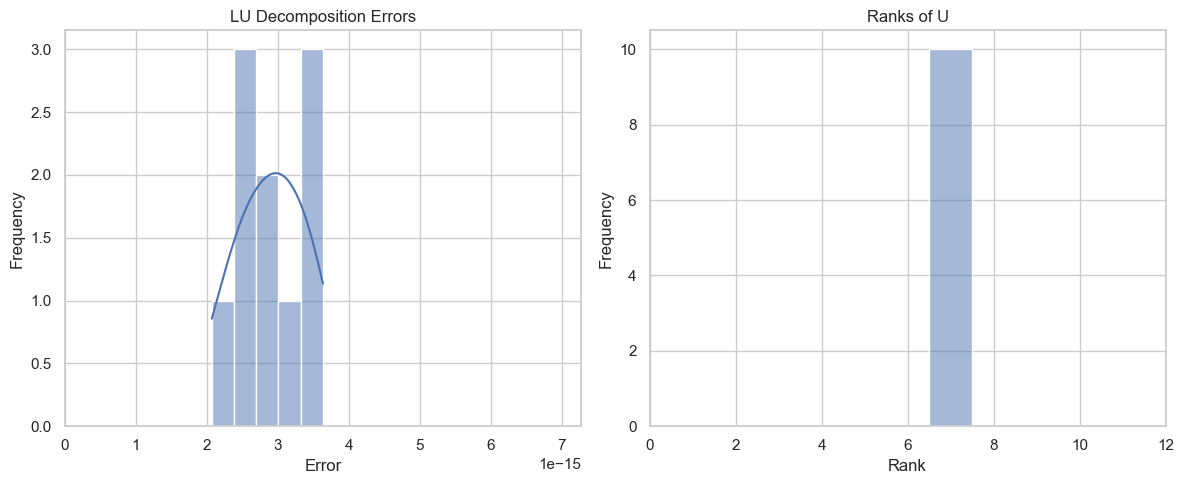

In [33]:
# plot the LU decomposition errors and the ranks of U as histograms.
# make the histogram visually pleasing.
sns.set(style="whitegrid")
fig, axs = plt.subplots(1, 2, figsize=(12, 5))
sns.histplot(errors, kde=True, ax=axs[0])
axs[0].set_title("LU Decomposition Errors")
axs[0].set_xlabel("Error")
axs[0].set_ylabel("Frequency")
axs[0].set_xlim([0, np.max(errors) * 2.])

sns.histplot(ranks, kde=True, ax=axs[1])
axs[1].set_title("Ranks of U")
axs[1].set_xlabel("Rank")
axs[1].set_ylabel("Frequency")
axs[1].set_xlim(0, np.max([n, m])+1)
plt.tight_layout()
plt.show()

In [34]:
# print out the final LU decomposition result in a pretty format.
print("Original matrix A:")
print(np.array2string(A, precision=2, suppress_small=True))
print("\nPermutation matrix Q:")
print(np.array2string(Q, precision=2, suppress_small=True))
print("\nLower triangular matrix L:")
print(np.array2string(L, precision=2, suppress_small=True))
print("\nUpper triangular matrix U:")
print(np.array2string(U, precision=2, suppress_small=True))
print(f"\nLU decomposition error: {error:.3e}")
print(f"Rank of A: {np.linalg.matrix_rank(A)}")
print(f"Rank of L: {np.linalg.matrix_rank(L)}")
print(f"Rank of U: {np.linalg.matrix_rank(U)}")

Original matrix A:
[[-0.5  -0.68 -2.17  3.2  -2.51  0.84  6.11 -3.74  1.37  1.82 -0.02]
 [ 0.68 -0.08  4.31 -1.61  1.69  0.75 -3.83  4.16 -1.2  -2.39  1.5 ]
 [-1.12 -3.23  3.34  1.25 -1.51  0.47  4.87  2.91 -0.91 -2.72 -1.58]
 [ 1.07  1.18  0.78 -0.57 -1.39  0.37  4.84  0.85  1.52  1.49  1.49]
 [-1.54 -2.3   0.36 -0.14  1.6  -1.12 -4.32 -0.29 -2.77 -0.81 -2.3 ]
 [-1.56 -3.36  0.96 -1.48  2.55  2.02 -1.37  2.9  -4.38 -0.22 -3.34]
 [-0.31 -0.73 -4.46  3.98 -5.56  0.74  6.66 -3.94  3.8  -2.39 -1.58]
 [ 0.35 -4.27 -1.34 -2.07 -4.41  2.46 -2.89 -2.29 -2.2  -1.61 -3.08]
 [-2.81 -5.17  1.7   3.95 -2.82 -2.32  1.75 -1.   -0.97 -5.03 -3.69]
 [ 0.05  0.77  2.7   0.31  0.88 -0.34  3.82  3.1   0.64 -0.1   1.23]]

Permutation matrix Q:
[[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0